In [ ]:
!pip install datascience

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.4 MB/s eta 0:00:00


In [ ]:
from datascience import *
%matplotlib inline
#path_data = '../../../../data/'
path_data = '/content/gdrive/MyDrive/DataScience/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 다중 범주

배심원단이 자격 있는 모집단을 대표하는지 여부는 계속해서 중요한 질문입니다. 우리는 1960년대의 Robert Swain보다 최근의 배심원단의 맥락에서 이를 다룰 것입니다.

평가의 일반적인 과정은 이전과 동일할 것입니다. 그러나 이번에는 두 개가 아닌 여러 인종 및 민족 범주의 배심원 후보를 고려할 것입니다. 기술적 관점에서, 이것은 시뮬레이션할 새로운 통계량을 생각해내야 한다는 것을 의미합니다. 시뮬레이션하고 결론에 도달한 후에는 관찰하는 불일치의 일부 근본 원인을 검토할 것입니다.

## 알라메다 카운티의 배심원 선정

2010년, 북부 캘리포니아 ACLU(American Civil Liberties Union)는 캘리포니아 알라메다 카운티의 배심원 선정에 관한 [보고서](https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf "ACLU_NC report")를 발표했습니다. 보고서는 알라메다 카운티의 배심원 후보 중 특정 인종 및 민족 그룹이 과소대표되고 있다고 결론지었으며, 자격 있는 배심원이 배심원단에 배정되는 과정에 대한 몇 가지 개혁을 제안했습니다. 이 섹션에서는 ACLU가 제공한 데이터를 분석할 것입니다.

이전 섹션에서 본 것처럼, 재판 배심원은 더 큰 배심원단에서 선정됩니다. 법에 따르면, 배심원단은 자격 있는 배심원 모집단을 대표해야 합니다. 캘리포니아에서는 "대표하는"이라는 단어가 "무작위로 선정된"으로 명확하게 정의됩니다. 캘리포니아 민사소송법 제197조는 "배심원 복무를 위해 선정된 모든 사람은 법원이 담당하는 지역 모집단의 대표적인 단면을 포함하는 출처 또는 출처들로부터 무작위로 선정되어야 한다"고 명시합니다.

여기서 "배심원 복무를 위해 선정된"은 배심원단에 선정되는 것을 의미합니다.

## 알라메다 카운티 배심원단의 구성

북부 캘리포니아 ACLU 연구의 초점은 알라메다 카운티 배심원단의 인종 및 민족 구성이었습니다. ACLU는 2009년과 2010년에 알라메다 카운티의 11건의 중죄 재판에서 배심원단의 구성에 대한 데이터를 수집했습니다. 이들 배심원단에서 배심원 복무를 위해 출석한 총 인원은 1453명이었습니다. ACLU는 이 모든 예비 배심원에 대한 인구통계 데이터를 수집하고 이를 카운티의 모든 자격 있는 배심원의 구성과 비교했습니다.

데이터는 아래 ``jury``라는 테이블에 표로 작성되어 있습니다. 각 범주에서 첫 번째 수치 값은 해당 범주의 모든 자격 있는 배심원 후보의 비율입니다. 두 번째 값은 선정 과정을 위해 출석한 사람들 중 해당 범주에 속한 사람들의 비율입니다.

다양한 범주의 레이블은 ACLU 보고서에서 가져온 것으로, ""기타" 범주에는 하나의 주요 인종 정체성을 확인하지 않고 혼혈로 확인한 사람들과 인종 또는 민족을 확인하지 않은 개인이 포함됩니다"라고 명시하고 있습니다. 레이블 `Asian/PI`는 "아시아계 또는 태평양 섬 주민"을 의미합니다. 레이블 `Black/AA`는 "흑인 또는 아프리카계 미국인"을 의미합니다.

In [ ]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


일부 민족은 연구의 배심원단에서 과다대표되고 일부는 과소대표됩니다. 특히, Black/AA 및 Hispanic 범주의 배심원 후보들이 과소대표됩니다.

막대 차트는 차이를 시각화하는 데 도움이 됩니다.

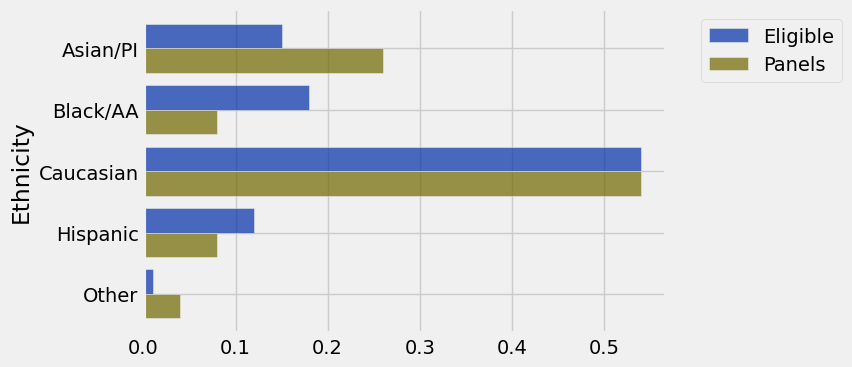

In [ ]:
jury.barh('Ethnicity')

## 무작위로 선정된 배심원단과의 비교
자격 있는 배심원 모집단에서 1,453명의 무작위 표본을 선정하면 어떻게 될까요? 그들의 민족 분포가 위의 배심원단의 분포와 같아 보일까요?

우리는 `sample_proportions`를 사용하고 표본의 비율 열로 `jury` 테이블을 보강함으로써 이러한 질문에 답할 수 있습니다.

**기술적 참고 사항.** 예비 배심원의 무작위 표본은 비복원 추출로 선정될 것입니다. 그러나 표본의 크기가 모집단의 크기에 비해 작을 때, 비복원 추출은 복원 추출과 유사합니다; 모집단의 비율은 추출 사이에 크게 변하지 않습니다. 알라메다 카운티의 자격 있는 배심원 모집단은 백만 명 이상이고, 그에 비해 약 1500명의 표본 크기는 상당히 작습니다. 따라서 우리는 복원 추출을 할 것입니다.

아래 셀에서, 우리는 자격 있는 배심원의 분포에서 1453번 무작위로 표본을 추출하고, 자격 있는 배심원 및 데이터의 배심원단 분포와 함께 무작위 표본의 분포를 표시합니다.

In [ ]:
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.14797
Black/AA,0.18,0.08,0.186511
Caucasian,0.54,0.54,0.52925
Hispanic,0.12,0.08,0.125258
Other,0.01,0.04,0.0110117


무작위 표본의 분포는 자격 있는 모집단의 분포와 상당히 비슷하지만, 배심원단의 분포는 그렇지 않습니다. 항상 그렇듯이, 시각화하는 것이 도움이 됩니다.

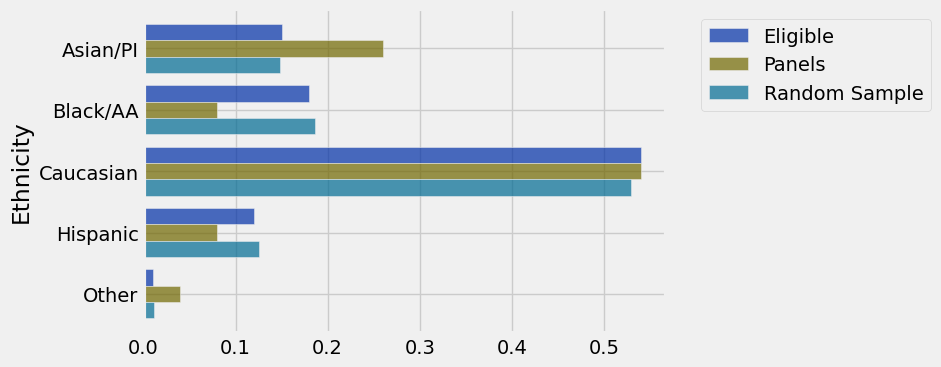

In [ ]:
panels_and_sample.barh('Ethnicity')

막대 차트는 무작위 표본의 분포가 자격 있는 모집단과 유사하지만 배심원단의 분포는 그렇지 않음을 보여줍니다.

이 관찰이 하나의 무작위 표본에 특정한 것인지 아니면 더 일반적인 것인지 평가하기 위해, 무작위 선정 모델 하에서 여러 배심원단을 시뮬레이션하고 시뮬레이션이 무엇을 예측하는지 볼 수 있습니다. 그러나 위와 같은 수천 개의 막대 차트를 볼 수는 없습니다. 무작위 선정 모델이 데이터에 의해 뒷받침되는지 여부를 평가하는 데 도움이 될 통계량이 필요합니다.

## 새로운 통계량: 두 분포 사이의 거리
우리는 두 숫자가 얼마나 다른지 측정하는 방법을 알고 있습니다: 숫자가 $x$와 $y$이면, 그들 사이의 거리는 $\vert x-y \vert$입니다. 이제 두 분포 사이의 거리를 정량화해야 합니다. 예를 들어, 아래의 파란색과 금색 분포 사이의 거리를 측정해야 합니다.

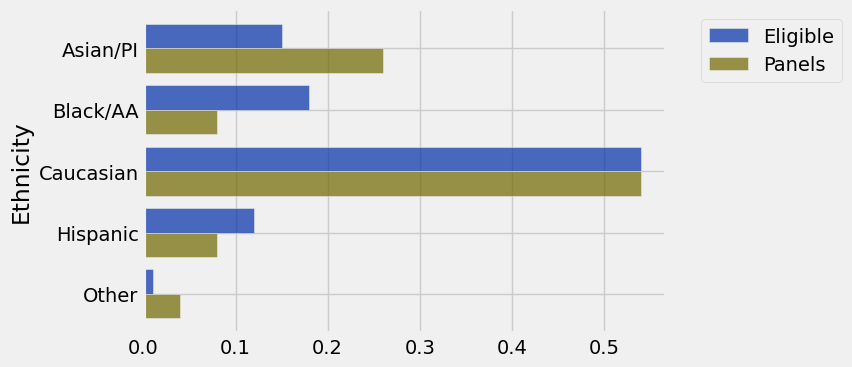

In [ ]:
jury.barh('Ethnicity')

이를 위해 우리는 두 분포 사이의 *총 변동 거리(total variation distance)*라는 양을 계산할 것입니다. 계산은 두 숫자 사이의 거리를 찾는 방법의 확장입니다.

총 변동 거리를 계산하기 위해, 먼저 각 범주에서 두 비율 사이의 차이를 찾습니다.

In [ ]:
# Augment the table with a column of differences between proportions

jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,-0.04
Other,0.01,0.04,0.03


`Difference` 열을 보면 그 항목의 합이 0임을 알 수 있습니다: 양수 항목은 0.14까지 더해지고, 음수 항목의 합계인 -0.14를 정확히 상쇄합니다.

이것은 막대 차트에서 금색 막대가 파란색 막대를 초과하는 정도가 파란색 막대가 금색 막대를 초과하는 정도와 정확히 같다는 사실의 수치적 증거입니다. ``Panels``와 ``Eligible`` 열의 각 비율은 1까지 더해지므로, 그들 항목 사이의 주고받기는 0까지 더해져야 합니다.

상쇄를 피하기 위해, 음수 기호를 제거하고 모든 항목을 더합니다. 그러나 이것은 양수 항목의 합계의 두 배를 제공합니다 (동등하게, 기호가 제거된 음수 항목의 합계의 두 배). 우리는 그 두 배를 필요로 하지 않으므로 합계를 2로 나눕니다.

In [ ]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian/PI,0.15,0.26,0.11,0.11
Black/AA,0.18,0.08,-0.1,0.1
Caucasian,0.54,0.54,0,0
Hispanic,0.12,0.08,-0.04,0.04
Other,0.01,0.04,0.03,0.03


In [ ]:
jury_with_diffs.column('Absolute Difference').sum() / 2

0.14000000000000001

이 양 0.14가 자격 있는 배심원 모집단의 민족 분포와 배심원단의 분포 사이의 *총 변동 거리(TVD)*입니다.

일반적으로, 두 분포 사이의 총 변동 거리는 분포가 얼마나 가까운지 측정합니다. TVD가 클수록 두 분포가 더 다르게 나타납니다.

**기술적 참고 사항:** 양수 차이만 더해서 같은 결과를 얻을 수도 있었습니다. 그러나 모든 절대 차이를 포함하는 우리의 방법은 어떤 차이가 양수이고 어떤 것이 그렇지 않은지 추적할 필요를 없앱니다.

우리는 무작위 선정의 가정 하에서 시뮬레이션할 통계량으로 분포 사이의 총 변동 거리를 사용할 것입니다. 거리의 큰 값은 무작위 선정에 반하는 증거가 될 것입니다.

## 모델 하에서 통계량 시뮬레이션
TVD가 무작위 표본에서 어떻게 변하는지 보기 위해, 자격 있는 모집단에서 무작위 선정 모델 하에서 반복적으로 시뮬레이션할 것입니다.

계산을 정리합시다. 총 변동 거리를 반복적으로 계산할 것이므로, 먼저 두 주어진 분포에 대해 이를 계산하는 함수를 작성할 것입니다.

`total_variation_distance` 함수는 비교할 분포를 포함하는 두 배열을 받아서 그들 사이의 TVD를 반환합니다.

In [ ]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

이 함수는 시뮬레이션의 각 반복에서 통계량을 계산하는 데 도움이 될 것입니다. 그러나 먼저 위의 파란색(자격 있는) 및 금색(배심원단) 분포 사이의 거리를 계산하는 데 사용할 때 올바른 답을 주는지 확인합시다. 이것들은 ACLU 연구의 분포입니다.

In [ ]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14000000000000001

이것은 우리가 함수를 사용하지 않고 직접 계산한 값과 일치합니다.

아래 셀에서 우리는 함수를 사용하여 자격 있는 배심원과 하나의 무작위 표본의 분포 사이의 TVD를 계산합니다. `eligible_population`이 자격 있는 배심원의 분포를 포함하는 배열이고 표본 크기가 1453임을 상기하십시오.

첫 번째 줄에서, 우리는 `sample_proportions`를 사용하여 자격 있는 모집단에서 무작위 표본을 생성합니다. 다음 줄에서 우리는 `total_variation_distance`를 사용하여 무작위 표본과 자격 있는 모집단의 분포 사이의 TVD를 계산합니다.

In [ ]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)

0.030385409497591227

셀을 몇 번 실행하고 거리가 0.14보다 상당히 작다는 것을 주목하십시오. 0.14는 배심원단과 자격 있는 배심원 사이의 거리입니다.

이제 무작위 선정 모델을 평가하기 위한 시뮬레이션을 실행할 준비가 되었습니다.

### 통계량의 한 값 시뮬레이션
모든 시뮬레이션을 시작하는 것과 같은 방식으로, 무작위 선정 가설 하에서 총 변동 거리의 시뮬레이션된 값 하나를 반환하는 `one_simulated_tvd` 함수를 정의합시다.

정의의 본문에 있는 코드는 위의 셀을 기반으로 합니다.

In [ ]:
# Simulate one simulated value of
# the total variation distance between
# the distribution of a sample selected at random
# and the distribution of the eligible population

def one_simulated_tvd():
    sample_distribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_distribution, eligible_population)

### 통계량의 여러 값 시뮬레이션
이제 `for` 루프를 사용하여 5000개의 그러한 거리로 구성된 배열을 만드는 익숙한 과정을 적용할 수 있습니다.

In [ ]:
tvds = make_array()
repetitions = 100000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

## 무작위 선정 모델 평가

다음은 시뮬레이션된 거리의 경험적 히스토그램입니다. 자격 있는 후보 풀에서 1453명의 배심원 후보를 무작위로 추출한다면, 배심원 후보와 자격 있는 모집단의 분포 사이의 거리가 약 0.05 이상인 경우는 드물다는 것을 보여줍니다.

그러나 연구의 배심원단은 자격 있는 모집단과 그다지 유사하지 않았습니다. 배심원단과 모집단 사이의 총 변동 거리는 0.14였으며, 가로축에 빨간 점으로 표시되어 있습니다. 히스토그램의 꼬리를 훨씬 넘어서 있으며 무작위 표본과 자격 있는 모집단의 분포 사이의 전형적인 거리처럼 전혀 보이지 않습니다.

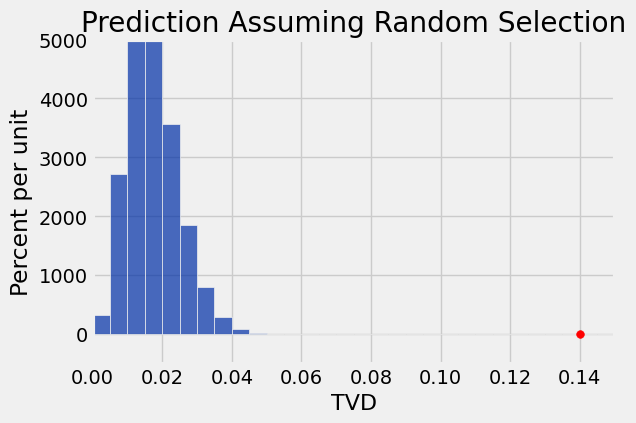

In [ ]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))

# Plotting parameters; you can ignore this code
plots.title('Prediction Assuming Random Selection')
plots.xlim(0, 0.15)
plots.ylim(-5, 50)
plots.scatter(0.14, 0, color='red', s=30);

시뮬레이션은 ACLU 연구의 배심원단 구성이 무작위 선정 모델과 일치하지 않음을 보여줍니다. 우리의 분석은 배심원단이 자격 있는 배심원에 대해 제공된 분포를 대표하지 않았다는 ACLU의 결론을 뒷받침합니다.

## 편향의 이유
대부분의 그러한 분석과 마찬가지로, 우리의 분석은 분포가 왜 다른지 말하지 *않습니다*. 그러나 그 이유를 이해하는 것이 중요합니다. 배심원단이 자격 있는 배심원 모집단을 대표하지 않는다면, 그것은 적법 절차와 배심원 재판의 공정성에 큰 영향을 미칠 수 있습니다.

ACLU 보고서는 불일치에 대한 몇 가지 가능한 이유를 논의하고 몇 가지 해결책을 제안합니다. 일부는 순전히 실용적이지만 큰 영향을 미칩니다. 예를 들어, Python에서 무작위 표본추출의 높은 품질을 당연하게 여길 수 있지만, 배심원단 선정은 다른 소프트웨어를 사용했습니다. ACLU의 조사에 따르면 소프트웨어가 잘 작동하지 않아 편향된 선정에 기여했습니다. 더 나은 소프트웨어를 사용하는 것이 명확한 해결책입니다.

더 중요하게는, 알라메다 카운티 배심원단은 전체 자격 있는 모집단에서 선정되지 않습니다. 알라메다 카운티 고등법원의 [웹사이트](http://www.alameda.courts.ca.gov/pages.aspx/faqs)는 "법원의 목표는 카운티 모집단의 정확한 단면을 제공하는 것입니다. 배심원의 이름은 등록된 유권자이거나 차량국에서 발급한 운전면허증 또는 신분증을 가진 모든 사람으로부터 무작위로 선정됩니다"라고 명시합니다.

이 과정은 이러한 목록에 없는 자격 있는 배심원을 배제합니다. 주에서 발급한 신분증을 가지고 있거나 유권자로 등록되어 있는 것은 소득과 관련이 있을 가능성이 높으며, 따라서 흑인 및 히스패닉 커뮤니티에 대한 역사적 편향으로 인해 인종 및 민족과도 관련이 있습니다. 이것은 배심원단에서 이러한 그룹의 과소대표로 이어집니다.

목록에 있는 사람들은 배심원 소환장을 알리기 위해 연락을 받아야 합니다. 그러나 자원이 부족한 커뮤니티의 사람들이 항상 고정 주소를 가지고 있는 것은 아닙니다. 오래된 주소 기록, 공익사업과 같은 다른 목록과의 교차 확인 부족 등은 모두 편향된 선정에 기여할 수 있습니다.

연락을 받으면, 예비 배심원은 여전히 출석할 수 있어야 합니다. 배심원 복무의 첫날은 보상되지 않으며, 이후 날짜에 대한 보상은 하루 \$15입니다. 고용주는 법으로 배심원 의무가 있는 직원을 면제해야 하지만 보상을 제공할 필요는 없으며, 일부 고용주는 그렇게 하지 않습니다. 베이 지역처럼 비싼 지역에서는 이것이 배심원 후보가 배심원 소환장에 응답하지 않는 이유가 될 수 있습니다. 배심원이 심각한 경제적 어려움으로 면제될 수 있지만, 면제를 요청하는 과정조차도 일부 배심원에게는 접근할 수 없을 수 있습니다. 베이 건너편에서 샌프란시스코의 시 지도자들은 저소득 배심원에게 하루 \$100의 보상을 제공하는 [프로그램](https://sftreasurer.org/new-ca-bill-pilots-higher-compensation-low-income-jurors-san-francisco)을 시범적으로 실시하여 이러한 형태의 편향을 줄이려고 시도하고 있습니다.

## 데이터 품질
우리는 한 분포가 다른 분포에서 무작위 표본처럼 보이는지 결정하는 데 도움이 되는 기법을 개발했습니다. 그러나 정확히 무엇을 결론지을 수 있는지 더 잘 이해하기 위해 데이터 출처를 검토해야 합니다. 좋은 데이터 과학에는 데이터가 어떻게 수집되었는지에 대한 사려 깊은 검토가 포함됩니다.

**자격 있는 배심원.** 모든 사람이 배심원으로 복무할 자격이 있는 것은 아니라는 점을 명심하는 것이 중요합니다. 알라메다 카운티 고등법원은 [웹사이트](http://www.alameda.courts.ca.gov/pages.aspx/jury-duty-overview)에서 "귀하가 18세 이상이고, 미국 시민이며, 소환된 카운티 또는 지구의 거주자인 경우 복무하도록 소환될 수 있습니다. 영어를 이해할 수 있어야 하고, 신체적 및 정신적으로 복무할 수 있어야 합니다. 또한, 지난 12개월 동안 어떤 종류의 배심원으로도 복무하지 않았어야 하며, 중죄로 유죄 판결을 받지 않았어야 합니다"라고 명시합니다.

인구조사가 인구통계 정보의 자연스러운 출처이지만, 인구조사는 이러한 모든 범주에 대한 데이터를 수집하지 않습니다. 따라서 ACLU는 다른 방법으로 자격 있는 배심원의 인구통계를 얻어야 했습니다.

그들이 사용한 것은 2002년 알라메다 카운티 재판을 위해 샌디에이고 주립대학교 교수가 개발한 일련의 추정치였습니다. 이러한 추정치는 2000년 인구조사를 기반으로 했으며 배심원 자격을 위한 기준도 고려했습니다.

따라서 우리가 자격 있는 모집단에 사용한 분포 자체가 추정치이며 따라서 오류의 대상이라는 점을 명심해야 합니다. 게다가, ACLU가 지적했듯이, 2010년 모집단에 대해 2000년 인구조사를 기반으로 한 추정치를 사용하는 것은 캘리포니아의 변화하는 인구통계로 인해 정확하지 않을 수 있습니다.

따라서 자격 있는 배심원 모집단에 사용된 분포는 정확하지 않을 수 있습니다.

**배심원단.** 1453명의 배심원 후보가 정확히 어떻게 다양한 민족 범주로 분류되었는지는 보고서에서 명확하지 않습니다. 보고서는 "변호사들이... 배심원단 데이터 수집에 협력했다"고만 말합니다.

누가 각 민족 범주로 분류되거나 자가 분류되는지에는 중요한 사회적, 문화적, 정치적 요인이 영향을 미칩니다. 배심원단의 해당 범주 정의가 자격 있는 배심원 분포의 추정치에 사용된 것과 동일한지도 명확하지 않습니다. 이것은 비교되는 두 분포 사이의 대응에 대한 의문을 제기합니다.

게다가, 배심원 후보에 대한 데이터는 복무를 위해 출석한 사람들로부터 얻어졌습니다. 우리가 논의한 것처럼, 모든 배심원 후보가 그렇게 하는 것은 아닙니다. 출석하지 않는 이유는 인종 및 민족과 관련이 있으며, 자원이 부족한 커뮤니티의 배심원 후보들에게 불균형적으로 영향을 미칩니다.

배심원 소환장에 응답하는 것은 법으로 요구됩니다. 그러나 ACLU가 지적했듯이, 연구 당시 알라메다 카운티는 소환되었지만 출석하지 않은 예비 배심원에 대한 효과적인 후속 조치 과정이 없었습니다. ACLU는 "최소한 예비 배심원에게 두 번째 통지를 발급해야 하는 출석 실패 프로그램"의 생성을 권장했습니다.

실제로, 미응답자에 대한 후속 조치는 편향을 줄일 것입니다. 우리의 분석을 위해서는 선정되었지만 복무를 위해 출석하지 않은 배심원 후보에 대한 인구통계 정보를 채우는 데 필요한 데이터가 없다는 것을 인정해야 합니다.

## 결론

위의 논의 때문에, 우리의 분석에서 무엇을 결론지을 수 있는지에 대해 정확해야 합니다.

- 우리는 복무를 위해 출석한 배심원 후보에 대해 제공된 분포가 자격 있는 모집단의 추정된 분포에서 무작위 표본처럼 보이지 않는다고 결론지을 수 있습니다.

ACLU 보고서의 논의처럼 우리의 논의는 두 분포 사이에 관찰된 일부 차이에 대한 이유와 소환된 배심원 후보가 출석하지 않을 수 있는 이유를 제시합니다. 거의 모든 이유가 사회의 역사적 인종적 편향에 뿌리를 두고 있으며, 그 편향의 지속적인 부정적 결과의 예입니다.